<a href="https://colab.research.google.com/github/dkplo/code/blob/master/Encripta%C3%A7%C3%A3o_e_vetoriza%C3%A7%C3%A3o_nova_ec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time

In [ ]:
temp_inicial = time.asctime()
print(temp_inicial)

Sun Aug 23 19:22:32 2020


In [ ]:
pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1D0Rv2TsRIqc6R-FHqk64UGhlWk_f55wO"})
downloaded.GetContentFile('good.csv')

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('good.csv')

In [ ]:
data = data.drop(data.columns[1:], axis=1)

In [ ]:
data.head()

,text
0,Nycticebus linglom is a fossil strepsirrhine p...
1,Oryzomys pliocaenicus is a fossil rodent from ...
2,.hack dt hk is a series of single player actio...
3,The You Drive Me Crazy Tour was the second con...
4,0 8 4 is the second episode of the first seaso...


In [ ]:
temp_carreg_planilha = time.asctime()
print(temp_carreg_planilha)

Sun Aug 23 19:23:33 2020


In [ ]:
data['separado_128'] = 0

In [ ]:
for i in data.index:
    a_dividir = data['text'][i]
    #print(tamanho, type(tamanho), a_dividir[0:10], type(a_dividir))
    lista = []
    j = 0
    while j < len(a_dividir):
        lista.append(a_dividir[j:j+127])
        j += 127
    data['separado_128'][i] = lista   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
temp_sep_blocos = time.asctime()
print(temp_sep_blocos)

Sun Aug 23 19:23:37 2020


In [ ]:
pip install PyCrypto

     |████████████████████████████████| 450kB 4.3MB/s 
  Created wheel for PyCrypto: filename=pycrypto-2.6.1-cp36-cp36m-linux_x86_64.whl size=499939 sha256=6cf9e5673a2a7d39d64f3ac93ab1b2d53624da78339cd622a424bc68fad12415
  Stored in directory: /root/.cache/pip/wheels/27/02/5e/77a69d0c16bb63c6ed32f5386f33a2809c94bd5414a2f6c196
Successfully built PyCrypto


In [ ]:
data['criptografia_rsa'] = 0
#data['criptografia_rsa_num'] = 0

In [ ]:
from Crypto.PublicKey import RSA
from Crypto import Random
import random

In [ ]:
random_generator = Random.new().read
key_rsa_gerada = RSA.generate(1024,random_generator)
#key_rsa_const = RSA.construct((4562440616559919233254967809794219445848793773612142633710576012832980327951647685170461360129818675489159009029073774003893761171038635633019918920664611439232173998520612068169160764180922369,23,4165706649902534952102361913290374276644550836776304143822699837804025516825381475932589751246205840236097224944375658605357208379589583368936660852943968440780606099325274327271991134448220787,115792089210356248762697446949407573530086143415290314195533631308867097853951,39402006196394479212279040100143613805079739270465446667948293404245721771496870329047266088258938001861606973112319))

In [ ]:
for j in data.index:
  lista = data['separado_128'][j]
  lista_criptografada_rsa = []
  lista_criptografada_rsa_num = []
  for i in range(0,len(lista)):
    a_criptografar = lista[i]
    lista_criptografada_rsa.append(key_rsa_gerada.encrypt(bytes(a_criptografar, encoding="ascii"),23)[0])
    #lista_criptografada_rsa_num.append(int.from_bytes(lista_criptografada_rsa[i], byteorder="little"))
  data['criptografia_rsa'][j] = lista_criptografada_rsa
  #data['criptografia_rsa_num'][j] = lista_criptografada_rsa_num

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
data.head()



,text,separado_128,criptografia_rsa
0,Nycticebus linglom is a fossil strepsirrhine p...,[Nycticebus linglom is a fossil strepsirrhine ...,"[b""K\x86Z\xe2\xdbn6\xbf\x15\x12\x8a\xe4\x93C\x..."
1,Oryzomys pliocaenicus is a fossil rodent from ...,[Oryzomys pliocaenicus is a fossil rodent from...,"[b""\x99\xb7\x0e-\xa5t\x00\x925VZ~\x90\xf2\xcfM..."
2,.hack dt hk is a series of single player actio...,[.hack dt hk is a series of single player acti...,"[b'R""\x0f\xab\x81\xd3B\x94\x83\x9e\x8alK\x83U\..."
3,The You Drive Me Crazy Tour was the second con...,[The You Drive Me Crazy Tour was the second co...,[b'\x87r\xe3\xd2\xf6\xb5\xa1\xb6\xa077\xfb\x80...
4,0 8 4 is the second episode of the first seaso...,[0 8 4 is the second episode of the first seas...,"[b""_S8\xf2g\xf4e\xb8'\xf2\xc0\t(\xdfk\x03}/-k\..."


In [ ]:
temp_rsa = time.asctime()
print(temp_rsa)

Sun Aug 23 19:30:59 2020


In [ ]:
data['criptografia_elgamal_parte1'] = 0
data['criptografia_elgamal_parte2'] = 0
#data['criptografia_elgamal_parte1_num'] = 0
#data['criptografia_elgamal_parte2_num'] = 0

In [ ]:
from Crypto.PublicKey import ElGamal

In [ ]:
key_elgamal = ElGamal.generate(1024,random_generator)
#key_elgamal_gerada = ElGamal.construct((9967,3543,6056,207)) #construção de uma chave com os parâmetros P, G, Y, X.

In [ ]:
for j in data.index:
  lista = data['separado_128'][j]
  lista_criptografada_elgamal_parte1 = []
  lista_criptografada_elgamal_parte2 = []
  #lista_criptografada_elgamal_parte1_num = []
  #lista_criptografada_elgamal_parte2_num = []
  for i in range(0,len(lista)):
    a_criptografar = lista[i]
    elgamal_k = random.getrandbits(16)
    lista_criptografada_elgamal_parte1.append(key_elgamal.encrypt(bytes(a_criptografar, encoding="ascii"),elgamal_k)[0])
    lista_criptografada_elgamal_parte2.append(key_elgamal.encrypt(bytes(a_criptografar, encoding="ascii"),elgamal_k)[1])
    #lista_criptografada_elgamal_parte1_num.append(int.from_bytes(lista_criptografada_elgamal_parte1[i], byteorder="little"))
    #lista_criptografada_elgamal_parte2_num.append(int.from_bytes(lista_criptografada_elgamal_parte2[i], byteorder="little"))
  data['criptografia_elgamal_parte1'][j] = lista_criptografada_elgamal_parte1
  data['criptografia_elgamal_parte2'][j] = lista_criptografada_elgamal_parte2
  #data['criptografia_elgamal_parte1_num'][j] = lista_criptografada_elgamal_parte1_num
  #data['criptografia_elgamal_parte2_num'][j] = lista_criptografada_elgamal_parte2_num

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
data.head()

,text,separado_128,criptografia_rsa,criptografia_elgamal_parte1,criptografia_elgamal_parte2
0,Nycticebus linglom is a fossil strepsirrhine p...,[Nycticebus linglom is a fossil strepsirrhine ...,"[b""K\x86Z\xe2\xdbn6\xbf\x15\x12\x8a\xe4\x93C\x...","[b""*=5\xaa\xe8\xe4\x0064\xd1\x9d\xcfd\x908\x18...",[b'Dc\x1fg`\xc9r&\x04\xa7|x\x05\x93&\x7f\x92\x...
1,Oryzomys pliocaenicus is a fossil rodent from ...,[Oryzomys pliocaenicus is a fossil rodent from...,"[b""\x99\xb7\x0e-\xa5t\x00\x925VZ~\x90\xf2\xcfM...","[b'\xa2\xf4\xef\xd6/\xf5\xb8\x89""\xa4\xd7\xe6\...",[b'\xc6\xa5\x94\xe7\x06N\xc8\x0e9\x90\x88Q\xe7...
2,.hack dt hk is a series of single player actio...,[.hack dt hk is a series of single player acti...,"[b'R""\x0f\xab\x81\xd3B\x94\x83\x9e\x8alK\x83U\...",[b'\x12\rh\x8aZ\xc6\x03\xa5\xb6\x91\x18-| S\x8...,[b'\xb3\xf8g\x190\xc2\xefy\xadENv\x8d6\x87\x19...
3,The You Drive Me Crazy Tour was the second con...,[The You Drive Me Crazy Tour was the second co...,[b'\x87r\xe3\xd2\xf6\xb5\xa1\xb6\xa077\xfb\x80...,"[b""[\x85\xf2\x84\xc0\x84e\xa2\xa7\xfe\xe9\xce\...",[b'\x89;x(\xfdy\xf5\xf2\x86E\x8f\x16\xaf\x01\x...
4,0 8 4 is the second episode of the first seaso...,[0 8 4 is the second episode of the first seas...,"[b""_S8\xf2g\xf4e\xb8'\xf2\xc0\t(\xdfk\x03}/-k\...",[b'\x0c&E\xa6\xbdW\xa8$\xdd\xc1US\x87\x11\x05\...,"[b""\xc4\xdd3m\xd2\xca\xb7|f\x96\xba]f\x13\x92%..."


In [ ]:
temp_elgamal = time.asctime()
print(temp_elgamal)

Sun Aug 23 20:04:30 2020


In [ ]:
data['EC_c1'] = 0
data['EC_c2'] = 0

In [ ]:
!sudo apt-get install libgmp3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgmp-dev libgmpxx4ldbl
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-dev
The following NEW packages will be installed:
  libgmp-dev libgmp3-dev libgmpxx4ldbl
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 327 kB of archives.
After this operation, 1,689 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmpxx4ldbl amd64 2:6.1.2+dfsg-2 [8,964 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmp-dev amd64 2:6.1.2+dfsg-2 [316 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmp3-dev amd64 2:6.1.2+dfsg-2 [1,996 B]
Fetched 327 kB in 0s (3,465 kB/s)
debconf: unable to initialize frontend: Dial

In [ ]:
pip install fastecdsa

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for fastecdsa: filename=fastecdsa-2.1.3-cp36-cp36m-linux_x86_64.whl size=89418 sha256=52637fd7073b89b5b163dcfde628bc8ef98752a6f8d2846822d764fb9687589f
  Stored in directory: /root/.cache/pip/wheels/b4/37/94/49137ecd811aabdfd227a1151d077d85db09572cd6ee36de95
Successfully built fastecdsa


In [ ]:
from fastecdsa.curve import secp256k1
from fastecdsa.point import Point

In [ ]:
x_p = 0x79be667ef9dcbbac55a06295ce870b07029bfcdb2dce28d959f2815b16f81798
y_p = 0x483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8

In [ ]:
ponto_P = Point(x_p, y_p, curve=secp256k1)

In [ ]:
controle = 0
for j in data.index:
  lista = data['separado_128'][j]
  lista_criptografada_ec_parte1 = []
  lista_criptografada_ec_parte2 = []
  chave_privada_b = random.getrandbits(128)
  chave_publica_k = chave_privada_b * ponto_P
  randomico_a = random.getrandbits(128)
  c1 = randomico_a * ponto_P
  for i in range(0,len(lista)):
    a_criptografar = lista[i]
    m = int.from_bytes(bytes(a_criptografar, encoding = 'ascii'), byteorder="little")
    c2 = (m * ponto_P) + (randomico_a * chave_publica_k)
    lista_criptografada_ec_parte1.append((c1.x,c1.y))
    lista_criptografada_ec_parte2.append((c2.x,c2.y))
  data['EC_c1'][j] = lista_criptografada_ec_parte1
  data['EC_c2'][j] = lista_criptografada_ec_parte2
  controle += 1
  print(controle)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A saída de streaming foi truncada nas últimas 5000 linhas.
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437

In [ ]:
temp_ec = time.asctime()
print(temp_ec)

Sun Aug 23 23:56:31 2020


In [ ]:
data.head()

,text,separado_128,criptografia_rsa,criptografia_elgamal_parte1,criptografia_elgamal_parte2,EC_c1,EC_c2
0,Nycticebus linglom is a fossil strepsirrhine p...,[Nycticebus linglom is a fossil strepsirrhine ...,"[b""K\x86Z\xe2\xdbn6\xbf\x15\x12\x8a\xe4\x93C\x...","[b""*=5\xaa\xe8\xe4\x0064\xd1\x9d\xcfd\x908\x18...",[b'Dc\x1fg`\xc9r&\x04\xa7|x\x05\x93&\x7f\x92\x...,[(11524613259812410433305961191838134251944504...,[(11506712147406728108730524628477423452912307...
1,Oryzomys pliocaenicus is a fossil rodent from ...,[Oryzomys pliocaenicus is a fossil rodent from...,"[b""\x99\xb7\x0e-\xa5t\x00\x925VZ~\x90\xf2\xcfM...","[b'\xa2\xf4\xef\xd6/\xf5\xb8\x89""\xa4\xd7\xe6\...",[b'\xc6\xa5\x94\xe7\x06N\xc8\x0e9\x90\x88Q\xe7...,[(11313562084132813298083346601307828797115526...,[(94822026278604812021981131411493538915576082...
2,.hack dt hk is a series of single player actio...,[.hack dt hk is a series of single player acti...,"[b'R""\x0f\xab\x81\xd3B\x94\x83\x9e\x8alK\x83U\...",[b'\x12\rh\x8aZ\xc6\x03\xa5\xb6\x91\x18-| S\x8...,[b'\xb3\xf8g\x190\xc2\xefy\xadENv\x8d6\x87\x19...,[(41150089191601580217896416247618055456633813...,[(45208983252345125996182808181069106732191744...
3,The You Drive Me Crazy Tour was the second con...,[The You Drive Me Crazy Tour was the second co...,[b'\x87r\xe3\xd2\xf6\xb5\xa1\xb6\xa077\xfb\x80...,"[b""[\x85\xf2\x84\xc0\x84e\xa2\xa7\xfe\xe9\xce\...",[b'\x89;x(\xfdy\xf5\xf2\x86E\x8f\x16\xaf\x01\x...,[(85818283882187630144517476239286133305235411...,[(32080156138635215695136434084012092873011803...
4,0 8 4 is the second episode of the first seaso...,[0 8 4 is the second episode of the first seas...,"[b""_S8\xf2g\xf4e\xb8'\xf2\xc0\t(\xdfk\x03}/-k\...",[b'\x0c&E\xa6\xbdW\xa8$\xdd\xc1US\x87\x11\x05\...,"[b""\xc4\xdd3m\xd2\xca\xb7|f\x96\xba]f\x13\x92%...",[(58466593102838575821715466215819826938269362...,[(10773326818638365148808373733955581612030606...


In [ ]:
print(data['criptografia_rsa'][0][0])
#print(data['criptografia_rsa_num'][0][0])
print(data['criptografia_elgamal_parte1'][0][0])
print(data['criptografia_elgamal_parte2'][0][0])
print(data['criptografia_elgamal_parte1'][0][1])
print(data['EC_c1'][0][0])
print(data['EC_c1'][1][0])


b"K\x86Z\xe2\xdbn6\xbf\x15\x12\x8a\xe4\x93C\x0e\x7f\xf2\xee\xeb\x08\x80\x0f\xd9\x87\x87/\xc6\xf3:F\xc4\xa3 \x98\xc6%\x16\xe0\x0c\xef\xd5\xc6\xae\x03\xc6U\x8f\xde{9\x90v\xb92\x04\xffY\xffm\xab5\x92\x1b\xdf\xc6\xd2L\x9d\xb8f\xaf\xcel\xfbX4\xae\n\xcfqBR\xf7j\x83S\x941\xae\x88\xf7\xb2'\xbb\xe0Z:\x7f.\xa2u\xbc\xd0)\xe4\x05\xd5\xf6\x17\xee!\xee\xec\xe9\x8c\xac\x9b\xdcR\xbd\xe6W\xcb\x9c\xed\xf1\x99\xa6"
b"*=5\xaa\xe8\xe4\x0064\xd1\x9d\xcfd\x908\x18\xbb\xe2D\xf6\xbbp\xba){`U\xcb^0\x98'z\x9f\x80LO]\x1f4\x91Nr\xff\x14\xf8\xe0:a\x90x\x16mM\xff\x06\x13\xe9\xa3+\xd9F\xd4\xc5\xa1N\xbe'T\xa2\xa9\xd0\xe1r\x91\xbeg\x89\xea\x99\xd1u\xc9\xa6\xcf\xa1\xd7_>-pQ\x06\x00\x9e\xee\xe9\xff\xa2\\\xee68\x83\x1f^\xb4\x15,\x97Lz?x\xef\xc5\x88\xc4c\x88\x06p\xd7\x94\xaez0\xeb"
b'Dc\x1fg`\xc9r&\x04\xa7|x\x05\x93&\x7f\x92\xdcR\xec\x98\xe4\tO\xb5\xed\x0eE}\xb0\xc29\x8a\xa4\t\xa4\x18w\xaf\x02\xf2Y~9\xfb=\xef\xb1*f\xc1K\xe1 \xae\xc4/\xa8\t\xa2\x19\xea\xfa\xb7\x1b:\x9f\xe3\x9f\xc8\x8b\xcd\x88\x01\xf2\xb1u\xde\xe7\x8f/\xce\x

In [ ]:
data['vetor_rsa'] = 0

In [ ]:
data['vetor_rsa'] = data['vetor_rsa'].astype(object)

In [ ]:
data.head()

,text,separado_128,criptografia_rsa,criptografia_elgamal_parte1,criptografia_elgamal_parte2,EC_c1,EC_c2,vetor_rsa
0,Nycticebus linglom is a fossil strepsirrhine p...,[Nycticebus linglom is a fossil strepsirrhine ...,"[b""K\x86Z\xe2\xdbn6\xbf\x15\x12\x8a\xe4\x93C\x...","[b""*=5\xaa\xe8\xe4\x0064\xd1\x9d\xcfd\x908\x18...",[b'Dc\x1fg`\xc9r&\x04\xa7|x\x05\x93&\x7f\x92\x...,[(11524613259812410433305961191838134251944504...,[(11506712147406728108730524628477423452912307...,0
1,Oryzomys pliocaenicus is a fossil rodent from ...,[Oryzomys pliocaenicus is a fossil rodent from...,"[b""\x99\xb7\x0e-\xa5t\x00\x925VZ~\x90\xf2\xcfM...","[b'\xa2\xf4\xef\xd6/\xf5\xb8\x89""\xa4\xd7\xe6\...",[b'\xc6\xa5\x94\xe7\x06N\xc8\x0e9\x90\x88Q\xe7...,[(11313562084132813298083346601307828797115526...,[(94822026278604812021981131411493538915576082...,0
2,.hack dt hk is a series of single player actio...,[.hack dt hk is a series of single player acti...,"[b'R""\x0f\xab\x81\xd3B\x94\x83\x9e\x8alK\x83U\...",[b'\x12\rh\x8aZ\xc6\x03\xa5\xb6\x91\x18-| S\x8...,[b'\xb3\xf8g\x190\xc2\xefy\xadENv\x8d6\x87\x19...,[(41150089191601580217896416247618055456633813...,[(45208983252345125996182808181069106732191744...,0
3,The You Drive Me Crazy Tour was the second con...,[The You Drive Me Crazy Tour was the second co...,[b'\x87r\xe3\xd2\xf6\xb5\xa1\xb6\xa077\xfb\x80...,"[b""[\x85\xf2\x84\xc0\x84e\xa2\xa7\xfe\xe9\xce\...",[b'\x89;x(\xfdy\xf5\xf2\x86E\x8f\x16\xaf\x01\x...,[(85818283882187630144517476239286133305235411...,[(32080156138635215695136434084012092873011803...,0
4,0 8 4 is the second episode of the first seaso...,[0 8 4 is the second episode of the first seas...,"[b""_S8\xf2g\xf4e\xb8'\xf2\xc0\t(\xdfk\x03}/-k\...",[b'\x0c&E\xa6\xbdW\xa8$\xdd\xc1US\x87\x11\x05\...,"[b""\xc4\xdd3m\xd2\xca\xb7|f\x96\xba]f\x13\x92%...",[(58466593102838575821715466215819826938269362...,[(10773326818638365148808373733955581612030606...,0


In [ ]:
lista_hex =[]
for i in range(0,2**(8)):
    lista_hex.append(hex(i))

In [ ]:
for i in data.index:
  vetor_mapeamento = {}
  for q in lista_hex:
    vetor_mapeamento[q] = 0
  lista_recuperada = data['criptografia_rsa'][i]
  for j in range(0,len(lista_recuperada)):
    a_mapear = lista_recuperada[j]
    for w in a_mapear:
      vetor_mapeamento[hex(w)] += 1
  data['vetor_rsa'][i] = list(vetor_mapeamento.values())

In [ ]:
data.head()

,text,separado_128,criptografia_rsa,criptografia_elgamal_parte1,criptografia_elgamal_parte2,EC_c1,EC_c2,vetor_rsa
0,Nycticebus linglom is a fossil strepsirrhine p...,[Nycticebus linglom is a fossil strepsirrhine ...,"[b""K\x86Z\xe2\xdbn6\xbf\x15\x12\x8a\xe4\x93C\x...","[b""*=5\xaa\xe8\xe4\x0064\xd1\x9d\xcfd\x908\x18...",[b'Dc\x1fg`\xc9r&\x04\xa7|x\x05\x93&\x7f\x92\x...,[(11524613259812410433305961191838134251944504...,[(11506712147406728108730524628477423452912307...,"[13, 14, 16, 9, 12, 17, 15, 17, 20, 17, 15, 13..."
1,Oryzomys pliocaenicus is a fossil rodent from ...,[Oryzomys pliocaenicus is a fossil rodent from...,"[b""\x99\xb7\x0e-\xa5t\x00\x925VZ~\x90\xf2\xcfM...","[b'\xa2\xf4\xef\xd6/\xf5\xb8\x89""\xa4\xd7\xe6\...",[b'\xc6\xa5\x94\xe7\x06N\xc8\x0e9\x90\x88Q\xe7...,[(11313562084132813298083346601307828797115526...,[(94822026278604812021981131411493538915576082...,"[14, 15, 10, 11, 13, 17, 7, 13, 12, 16, 10, 14..."
2,.hack dt hk is a series of single player actio...,[.hack dt hk is a series of single player acti...,"[b'R""\x0f\xab\x81\xd3B\x94\x83\x9e\x8alK\x83U\...",[b'\x12\rh\x8aZ\xc6\x03\xa5\xb6\x91\x18-| S\x8...,[b'\xb3\xf8g\x190\xc2\xefy\xadENv\x8d6\x87\x19...,[(41150089191601580217896416247618055456633813...,[(45208983252345125996182808181069106732191744...,"[91, 93, 82, 77, 76, 83, 83, 97, 97, 89, 95, 8..."
3,The You Drive Me Crazy Tour was the second con...,[The You Drive Me Crazy Tour was the second co...,[b'\x87r\xe3\xd2\xf6\xb5\xa1\xb6\xa077\xfb\x80...,"[b""[\x85\xf2\x84\xc0\x84e\xa2\xa7\xfe\xe9\xce\...",[b'\x89;x(\xfdy\xf5\xf2\x86E\x8f\x16\xaf\x01\x...,[(85818283882187630144517476239286133305235411...,[(32080156138635215695136434084012092873011803...,"[26, 25, 24, 18, 26, 17, 17, 20, 18, 21, 25, 2..."
4,0 8 4 is the second episode of the first seaso...,[0 8 4 is the second episode of the first seas...,"[b""_S8\xf2g\xf4e\xb8'\xf2\xc0\t(\xdfk\x03}/-k\...",[b'\x0c&E\xa6\xbdW\xa8$\xdd\xc1US\x87\x11\x05\...,"[b""\xc4\xdd3m\xd2\xca\xb7|f\x96\xba]f\x13\x92%...",[(58466593102838575821715466215819826938269362...,[(10773326818638365148808373733955581612030606...,"[39, 43, 39, 34, 36, 34, 41, 46, 32, 43, 46, 4..."


In [ ]:
data['label_rsa'] = 2

In [ ]:
data['vetor_elgamal'] = 0

In [ ]:
data['vetor_elgamal'] = data['vetor_elgamal'].astype(object)

In [ ]:
for i in data.index:
  vetor_mapeamento = {}
  for q in lista_hex:
    vetor_mapeamento[q] = 0
  lista_recuperada = data['criptografia_elgamal_parte1'][i]
  for j in range(0,len(lista_recuperada)):
    a_mapear = lista_recuperada[j]
    for w in a_mapear:
      vetor_mapeamento[hex(w)] += 1
  lista_recuperada = data['criptografia_elgamal_parte2'][i]
  for j in range(0,len(lista_recuperada)):
    a_mapear = lista_recuperada[j]
    for w in a_mapear:
      vetor_mapeamento[hex(w)] += 1
  data['vetor_elgamal'][i] = list(vetor_mapeamento.values())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
data['label_elgamal'] = 1

In [ ]:
data['vetor_ec'] = 0
data['vetor_ec'] = data['vetor_ec'].astype(object)

In [ ]:
for i in data.index:
  vetor_mapeamento = {}
  for q in lista_hex:
    vetor_mapeamento[q] = 0
  lista_recuperada = data['EC_c1'][i]
  for j in range(0,len(lista_recuperada)):
    a_mapear = lista_recuperada[j]
    coord_x = a_mapear[0].to_bytes(32,byteorder='little')
    coord_y = a_mapear[1].to_bytes(32,byteorder='little')
    for w in coord_x:
      vetor_mapeamento[hex(w)] += 1
    for w in coord_y:
      vetor_mapeamento[hex(w)] += 1
  lista_recuperada = data['EC_c2'][i]
  for j in range(0,len(lista_recuperada)):
    a_mapear = lista_recuperada[j]
    coord_x = a_mapear[0].to_bytes(32,byteorder='little')
    coord_y = a_mapear[1].to_bytes(32,byteorder='little')
    for z in coord_x:
      vetor_mapeamento[hex(z)] += 1
    for z in coord_y:
      vetor_mapeamento[hex(z)] += 1
  data['vetor_ec'][i] = list(vetor_mapeamento.values())

  #print(a_mapear[0])
  #print(a_mapear[0].to_bytes(32,byteorder='little'))
  #print(int.from_bytes(a_mapear[0].to_bytes(32,byteorder='little'), byteorder='little'))
  #print(a_mapear[1])
  #print(a_mapear[1].to_bytes(32,byteorder='little'))
  #print(int.from_bytes(a_mapear[1].to_bytes(32,byteorder='little'), byteorder='little'))
  #print("nova rodada")




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [123]:
data['label_ec'] = 3

In [124]:
data.head()

,text,separado_128,criptografia_rsa,criptografia_elgamal_parte1,criptografia_elgamal_parte2,EC_c1,EC_c2,vetor_rsa,label_rsa,vetor_elgamal,label_elgamal,vetor_ec,label_ec,tamanho_texto
0,Nycticebus linglom is a fossil strepsirrhine p...,[Nycticebus linglom is a fossil strepsirrhine ...,"[b""K\x86Z\xe2\xdbn6\xbf\x15\x12\x8a\xe4\x93C\x...","[b""*=5\xaa\xe8\xe4\x0064\xd1\x9d\xcfd\x908\x18...",[b'Dc\x1fg`\xc9r&\x04\xa7|x\x05\x93&\x7f\x92\x...,[(11524613259812410433305961191838134251944504...,[(11506712147406728108730524628477423452912307...,"[13, 14, 16, 9, 12, 17, 15, 17, 20, 17, 15, 13...",2,"[26, 30, 29, 31, 26, 35, 25, 28, 32, 30, 36, 3...",1,"[5, 38, 35, 9, 9, 8, 8, 9, 9, 9, 4, 7, 6, 4, 3...",3,3466
1,Oryzomys pliocaenicus is a fossil rodent from ...,[Oryzomys pliocaenicus is a fossil rodent from...,"[b""\x99\xb7\x0e-\xa5t\x00\x925VZ~\x90\xf2\xcfM...","[b'\xa2\xf4\xef\xd6/\xf5\xb8\x89""\xa4\xd7\xe6\...",[b'\xc6\xa5\x94\xe7\x06N\xc8\x0e9\x90\x88Q\xe7...,[(11313562084132813298083346601307828797115526...,[(94822026278604812021981131411493538915576082...,"[14, 15, 10, 11, 13, 17, 7, 13, 12, 16, 10, 14...",2,"[39, 26, 26, 24, 29, 30, 20, 26, 28, 21, 23, 2...",1,"[11, 32, 3, 4, 8, 3, 5, 6, 4, 6, 4, 8, 7, 12, ...",3,3230
2,.hack dt hk is a series of single player actio...,[.hack dt hk is a series of single player acti...,"[b'R""\x0f\xab\x81\xd3B\x94\x83\x9e\x8alK\x83U\...",[b'\x12\rh\x8aZ\xc6\x03\xa5\xb6\x91\x18-| S\x8...,[b'\xb3\xf8g\x190\xc2\xefy\xadENv\x8d6\x87\x19...,[(41150089191601580217896416247618055456633813...,[(45208983252345125996182808181069106732191744...,"[91, 93, 82, 77, 76, 83, 83, 97, 97, 89, 95, 8...",2,"[185, 148, 170, 185, 164, 179, 171, 187, 175, ...",1,"[44, 45, 415, 220, 47, 221, 228, 35, 42, 237, ...",3,22691
3,The You Drive Me Crazy Tour was the second con...,[The You Drive Me Crazy Tour was the second co...,[b'\x87r\xe3\xd2\xf6\xb5\xa1\xb6\xa077\xfb\x80...,"[b""[\x85\xf2\x84\xc0\x84e\xa2\xa7\xfe\xe9\xce\...",[b'\x89;x(\xfdy\xf5\xf2\x86E\x8f\x16\xaf\x01\x...,[(85818283882187630144517476239286133305235411...,[(32080156138635215695136434084012092873011803...,"[26, 25, 24, 18, 26, 17, 17, 20, 18, 21, 25, 2...",2,"[38, 33, 43, 59, 53, 38, 51, 50, 38, 44, 38, 4...",1,"[10, 6, 15, 55, 57, 10, 6, 58, 7, 7, 6, 100, 1...",3,5620
4,0 8 4 is the second episode of the first seaso...,[0 8 4 is the second episode of the first seas...,"[b""_S8\xf2g\xf4e\xb8'\xf2\xc0\t(\xdfk\x03}/-k\...",[b'\x0c&E\xa6\xbdW\xa8$\xdd\xc1US\x87\x11\x05\...,"[b""\xc4\xdd3m\xd2\xca\xb7|f\x96\xba]f\x13\x92%...",[(58466593102838575821715466215819826938269362...,[(10773326818638365148808373733955581612030606...,"[39, 43, 39, 34, 36, 34, 41, 46, 32, 43, 46, 4...",2,"[82, 80, 74, 80, 81, 76, 62, 66, 67, 73, 69, 6...",1,"[18, 24, 21, 19, 89, 13, 91, 17, 9, 96, 16, 23...",3,9303


In [ ]:
print(data['vetor_rsa'][1000])
print(data['vetor_elgamal'][1000])
print(data['vetor_ec'][1000])
print(len(data['vetor_rsa'][1000]))
print(len(data['vetor_elgamal'][1000]))
print(len(data['vetor_ec'][1000]))

[55, 62, 49, 51, 66, 64, 63, 72, 51, 52, 64, 56, 62, 52, 76, 48, 58, 67, 68, 59, 62, 53, 68, 76, 58, 72, 67, 44, 60, 67, 54, 53, 62, 49, 56, 52, 57, 50, 70, 63, 53, 64, 59, 58, 60, 69, 56, 68, 52, 53, 59, 55, 66, 64, 65, 57, 67, 74, 60, 71, 54, 58, 65, 59, 63, 53, 56, 64, 67, 49, 60, 61, 70, 44, 67, 57, 63, 51, 53, 54, 59, 71, 65, 63, 62, 52, 47, 57, 55, 63, 74, 58, 66, 52, 70, 50, 55, 49, 45, 54, 61, 51, 67, 62, 67, 72, 49, 43, 51, 63, 62, 58, 64, 71, 62, 71, 67, 57, 49, 57, 54, 71, 66, 69, 58, 59, 54, 52, 58, 50, 55, 51, 64, 70, 52, 56, 63, 59, 68, 68, 52, 51, 67, 59, 52, 58, 53, 73, 68, 63, 65, 52, 69, 54, 57, 55, 65, 58, 56, 56, 67, 59, 68, 63, 54, 54, 63, 49, 64, 66, 54, 74, 64, 60, 54, 50, 45, 50, 51, 63, 67, 63, 52, 59, 45, 57, 57, 57, 64, 73, 55, 63, 61, 69, 53, 53, 40, 76, 57, 55, 51, 65, 41, 62, 53, 52, 52, 64, 60, 64, 54, 58, 46, 70, 45, 49, 61, 52, 69, 56, 55, 74, 57, 56, 58, 54, 70, 56, 75, 60, 59, 56, 57, 57, 65, 60, 55, 44, 61, 62, 54, 48, 49, 66, 56, 54, 48, 60, 55, 60,

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from numpy import save

In [ ]:
save('/content/drive/My Drive/vetor_rsa_numpy_23_08_20.npy',data.loc[:, 'vetor_rsa':'label_rsa'].to_numpy())

In [ ]:
save('/content/drive/My Drive/vetor_elgamal_numpy_23_08_20.npy',data.loc[:, 'vetor_elgamal':'label_elgamal'].to_numpy())

In [125]:
save('/content/drive/My Drive/vetor_ec_numpy_23_08_20.npy',data.loc[:, 'vetor_ec':'label_ec'].to_numpy())

In [ ]:
data.loc[:, 'vetor_rsa':'label_rsa'].to_csv('export_vetor_rsa_23_08_20.csv', index = True)
!cp export_vetor_rsa_23_08_20.csv "/content/drive/My Drive/"

In [ ]:
data.loc[:, 'vetor_elgamal':'label_elgamal'].to_csv('export_vetor_elgamal_23_08_20.csv', index = True)
!cp export_vetor_elgamal_23_08_20.csv "/content/drive/My Drive/"

In [126]:
data.loc[:, 'vetor_ec':'label_ec'].to_csv('export_vetor_ec_23_08_20.csv', index = True)
!cp export_vetor_ec_23_08_20.csv "/content/drive/My Drive/"

In [101]:
tamanho_textos = []
for i in data.index:
  tamanho_textos.append(len(data['text'][i]))
print((tamanho_textos))

[3466, 3230, 22691, 5620, 9303, 26929, 6504, 6424, 4427, 4940, 5938, 27405, 10552, 11459, 10203, 53284, 20221, 6522, 22191, 6979, 5498, 23971, 20334, 11987, 12779, 12642, 41520, 7902, 2372, 10059, 5965, 9536, 5119, 28357, 4962, 9490, 7971, 41870, 16661, 16597, 28133, 24479, 29503, 17460, 11363, 13580, 19360, 18828, 24785, 19798, 15758, 24189, 11613, 14019, 24132, 25410, 17480, 30313, 15470, 4225, 38448, 11366, 17365, 15352, 36952, 17237, 8031, 6099, 24103, 18201, 14770, 14233, 16700, 23963, 62230, 8147, 13702, 5254, 19463, 8190, 16458, 7188, 9975, 9038, 16776, 21039, 5917, 37999, 29592, 10012, 19925, 5298, 24687, 3578, 8590, 18278, 28566, 7721, 6657, 23311, 9907, 14313, 3724, 10794, 37128, 34100, 4722, 7341, 6886, 34368, 11270, 4109, 9121, 5274, 6075, 9509, 18613, 13861, 10795, 10479, 8997, 9036, 13678, 24328, 22351, 11212, 14526, 35138, 20009, 35380, 24237, 19072, 18736, 20394, 18088, 11151, 18301, 22332, 5017, 20371, 4403, 5449, 15283, 4684, 5789, 5839, 34504, 6407, 6484, 10408, 4221

In [107]:
import matplotlib.pyplot as plt

In [108]:
x = range(30279)

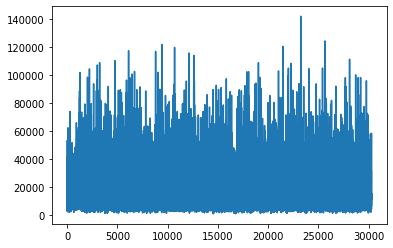

In [110]:
plt.plot(x,tamanho_textos)



In [111]:
data['tamanho_texto'] = 0

In [112]:
for i in data.index:
  data['tamanho_texto'][i] = len(data['text'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
data.head()

,text,separado_128,criptografia_rsa,criptografia_elgamal_parte1,criptografia_elgamal_parte2,EC_c1,EC_c2,vetor_rsa,label_rsa,vetor_elgamal,label_elgamal,vetor_ec,label_ec,tamanho_texto
0,Nycticebus linglom is a fossil strepsirrhine p...,[Nycticebus linglom is a fossil strepsirrhine ...,"[b""K\x86Z\xe2\xdbn6\xbf\x15\x12\x8a\xe4\x93C\x...","[b""*=5\xaa\xe8\xe4\x0064\xd1\x9d\xcfd\x908\x18...",[b'Dc\x1fg`\xc9r&\x04\xa7|x\x05\x93&\x7f\x92\x...,[(11524613259812410433305961191838134251944504...,[(11506712147406728108730524628477423452912307...,"[13, 14, 16, 9, 12, 17, 15, 17, 20, 17, 15, 13...",2,"[26, 30, 29, 31, 26, 35, 25, 28, 32, 30, 36, 3...",1,"[5, 38, 35, 9, 9, 8, 8, 9, 9, 9, 4, 7, 6, 4, 3...",0,3466
1,Oryzomys pliocaenicus is a fossil rodent from ...,[Oryzomys pliocaenicus is a fossil rodent from...,"[b""\x99\xb7\x0e-\xa5t\x00\x925VZ~\x90\xf2\xcfM...","[b'\xa2\xf4\xef\xd6/\xf5\xb8\x89""\xa4\xd7\xe6\...",[b'\xc6\xa5\x94\xe7\x06N\xc8\x0e9\x90\x88Q\xe7...,[(11313562084132813298083346601307828797115526...,[(94822026278604812021981131411493538915576082...,"[14, 15, 10, 11, 13, 17, 7, 13, 12, 16, 10, 14...",2,"[39, 26, 26, 24, 29, 30, 20, 26, 28, 21, 23, 2...",1,"[11, 32, 3, 4, 8, 3, 5, 6, 4, 6, 4, 8, 7, 12, ...",0,3230
2,.hack dt hk is a series of single player actio...,[.hack dt hk is a series of single player acti...,"[b'R""\x0f\xab\x81\xd3B\x94\x83\x9e\x8alK\x83U\...",[b'\x12\rh\x8aZ\xc6\x03\xa5\xb6\x91\x18-| S\x8...,[b'\xb3\xf8g\x190\xc2\xefy\xadENv\x8d6\x87\x19...,[(41150089191601580217896416247618055456633813...,[(45208983252345125996182808181069106732191744...,"[91, 93, 82, 77, 76, 83, 83, 97, 97, 89, 95, 8...",2,"[185, 148, 170, 185, 164, 179, 171, 187, 175, ...",1,"[44, 45, 415, 220, 47, 221, 228, 35, 42, 237, ...",0,22691
3,The You Drive Me Crazy Tour was the second con...,[The You Drive Me Crazy Tour was the second co...,[b'\x87r\xe3\xd2\xf6\xb5\xa1\xb6\xa077\xfb\x80...,"[b""[\x85\xf2\x84\xc0\x84e\xa2\xa7\xfe\xe9\xce\...",[b'\x89;x(\xfdy\xf5\xf2\x86E\x8f\x16\xaf\x01\x...,[(85818283882187630144517476239286133305235411...,[(32080156138635215695136434084012092873011803...,"[26, 25, 24, 18, 26, 17, 17, 20, 18, 21, 25, 2...",2,"[38, 33, 43, 59, 53, 38, 51, 50, 38, 44, 38, 4...",1,"[10, 6, 15, 55, 57, 10, 6, 58, 7, 7, 6, 100, 1...",0,5620
4,0 8 4 is the second episode of the first seaso...,[0 8 4 is the second episode of the first seas...,"[b""_S8\xf2g\xf4e\xb8'\xf2\xc0\t(\xdfk\x03}/-k\...",[b'\x0c&E\xa6\xbdW\xa8$\xdd\xc1US\x87\x11\x05\...,"[b""\xc4\xdd3m\xd2\xca\xb7|f\x96\xba]f\x13\x92%...",[(58466593102838575821715466215819826938269362...,[(10773326818638365148808373733955581612030606...,"[39, 43, 39, 34, 36, 34, 41, 46, 32, 43, 46, 4...",2,"[82, 80, 74, 80, 81, 76, 62, 66, 67, 73, 69, 6...",1,"[18, 24, 21, 19, 89, 13, 91, 17, 9, 96, 16, 23...",0,9303


In [117]:
tamanho_textos = pd.Series(data['tamanho_texto'])

In [118]:
tamanho_textos

0         3466
1         3230
2        22691
3         5620
4         9303
         ...  
30274    32625
30275     6667
30276     9625
30277    15576
30278    11186
Name: tamanho_texto, Length: 30279, dtype: int64

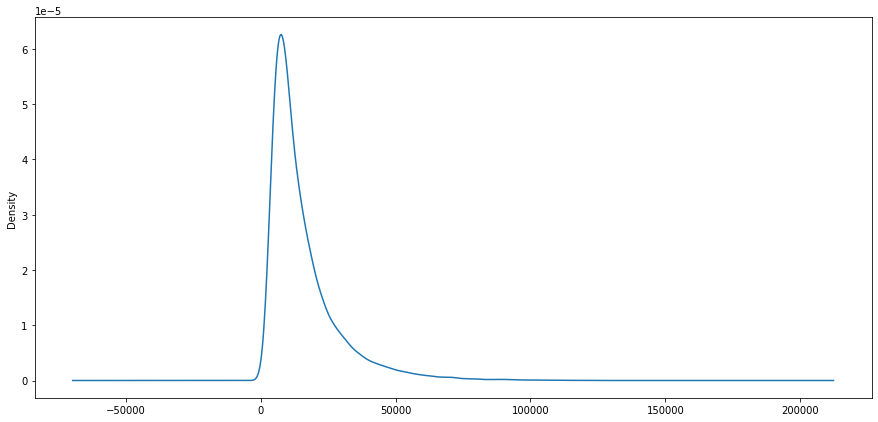

In [120]:
tamanho_textos.plot.kde(figsize=(15,7))

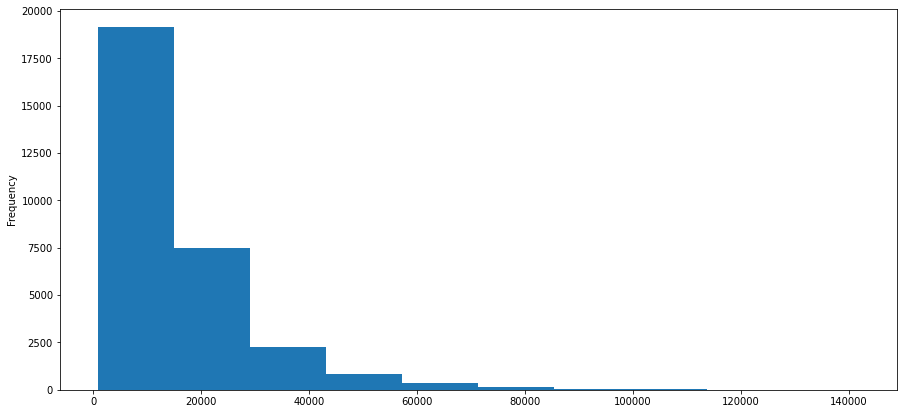

In [122]:
tamanho_textos.plot.hist(figsize=(15,7))